In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Loan_Default.csv')

In [5]:
#Displaying the top rows of the dataset
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Description of the data**

In [6]:
#Displaying the columns in the dataset
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
#shape of the dataframe
print(data.shape)
print("Number of rows in the dataframe:", data.shape[0])
print("Number of columns in the dataframe:", data.shape[1])

(148670, 34)
Number of rows in the dataframe: 148670
Number of columns in the dataframe: 34


In [8]:
#Displaying column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
#Displaying summary of numerical columns
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
#Displaying the description of all columns
data.describe(include = 'all')

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
count,148670.000000,148670.0,145326,148670,147762,148670,148536,148670,148670,148670,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,148549,148670,148670,1.335720e+05,148670,148670,148670,148670,139520.000000,148670,148670.000000,148670,148470,148470,133572.000000,148670,148670,148670.000000,124549.000000
unique,NaN,NaN,2,4,2,3,4,2,2,2,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,2,3,2,4,NaN,4,NaN,2,7,2,NaN,4,2,NaN,NaN
top,NaN,NaN,cf,Male,nopre,type1,p3,l1,nopc,nob/c,NaN,NaN,NaN,NaN,NaN,not_neg,not_int,not_lpsm,NaN,sb,pr,home,1U,NaN,CIB,NaN,CIB,45-54,to_inst,NaN,North,direct,NaN,NaN
freq,NaN,NaN,135348,42346,124621,113173,55934,142344,148114,127908,NaN,NaN,NaN,NaN,NaN,133420,141560,145286,NaN,148637,138201,148637,146480,NaN,48152,NaN,74392,34720,95814,NaN,74722,148637,NaN,NaN
mean,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,NaN,NaN,NaN,4.978935e+05,NaN,NaN,NaN,NaN,6957.338876,NaN,699.789103,NaN,NaN,NaN,72.746457,NaN,NaN,0.246445,37.732932
std,42917.476598,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,NaN,NaN,NaN,3.599353e+05,NaN,NaN,NaN,NaN,6496.586382,NaN,115.875857,NaN,NaN,NaN,39.967603,NaN,NaN,0.430942,10.545435
min,24890.000000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,NaN,NaN,NaN,8.000000e+03,NaN,NaN,NaN,NaN,0.000000,NaN,500.000000,NaN,NaN,NaN,0.967478,NaN,NaN,0.000000,5.000000
25%,62057.250000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.965000e+05,3.625000,0.076000,581.490000,360.000000,NaN,NaN,NaN,2.680000e+05,NaN,NaN,NaN,NaN,3720.000000,NaN,599.000000,NaN,NaN,NaN,60.474860,NaN,NaN,0.000000,31.000000
50%,99224.500000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,NaN,NaN,NaN,4.180000e+05,NaN,NaN,NaN,NaN,5760.000000,NaN,699.000000,NaN,NaN,NaN,75.135870,NaN,NaN,0.000000,39.000000
75%,136391.750000,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,NaN,NaN,NaN,6.280000e+05,NaN,NaN,NaN,NaN,8520.000000,NaN,800.000000,NaN,NaN,NaN,86.184211,NaN,NaN,0.000000,45.000000


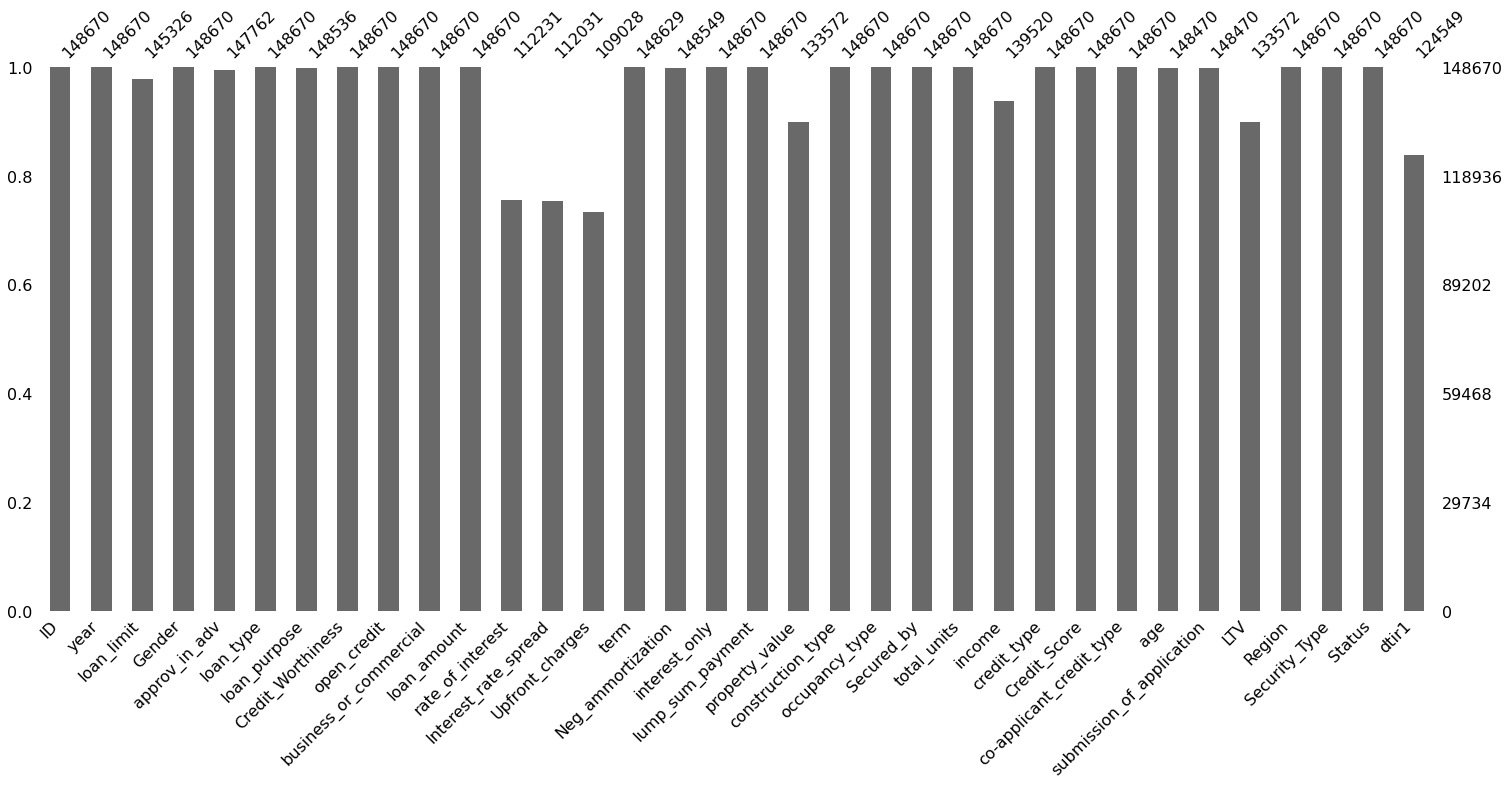

In [11]:
#Displaying the missing values in each column
msno.bar(data)

In [12]:
#cleaning of columns and chaning to appropriate data types
data1=data.copy(deep=True)
data1['Gender']=data1['Gender'].astype('category')
data1['approv_in_adv']=data1['approv_in_adv'].astype('category')
data1['loan_limit']=data1['loan_limit'].astype('category')
data1['loan_type']=data1['loan_type'].astype('category')
data1['loan_purpose']=data1['loan_purpose'].astype('category')
data1['Credit_Worthiness']=data1['Credit_Worthiness'].astype('category')
data1['open_credit']=data1['open_credit'].astype('category')
data1['business_or_commercial']=data1['business_or_commercial'].astype('category')
data1['Neg_ammortization']=data1['Neg_ammortization'].astype('category')
data1['interest_only']=data1['interest_only'].astype('category')
data1['lump_sum_payment']=data1['lump_sum_payment'].astype('category')
data1['construction_type']=data1['construction_type'].astype('category')
data1['occupancy_type']=data1['occupancy_type'].astype('category')
data1['Secured_by']=data1['Secured_by'].astype('category')
data1['total_units']=data1['total_units'].astype('category')
data1['credit_type']=data1['credit_type'].astype('category')
data1['co-applicant_credit_type']=data1['co-applicant_credit_type'].astype('category')
data1['submission_of_application']=data1['submission_of_application'].astype('category')
data1['Region']=data1['Region'].astype('category')
data1['Security_Type']=data1['Security_Type'].astype('category')



In [13]:
#5 number summary of Numerical Columns
data1.describe(percentiles=[0.25,0.50,0.75,0.85,0.95])

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
85%,151258.650000,2019.0,5.065000e+05,4.625000,1.025000,6221.345000,360.000000,7.580000e+05,10500.000000,840.000000,92.721519,1.000000,48.000000
95%,166125.550000,2019.0,6.565000e+05,4.990000,1.379400,9272.688500,360.000000,1.058000e+06,15420.000000,881.000000,98.728814,1.000000,54.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [14]:
#Checking the datatypes after altering
data1.dtypes

ID                              int64
year                            int64
loan_limit                   category
Gender                       category
approv_in_adv                category
loan_type                    category
loan_purpose                 category
Credit_Worthiness            category
open_credit                  category
business_or_commercial       category
loan_amount                     int64
rate_of_interest              float64
Interest_rate_spread          float64
Upfront_charges               float64
term                          float64
Neg_ammortization            category
interest_only                category
lump_sum_payment             category
property_value                float64
construction_type            category
occupancy_type               category
Secured_by                   category
total_units                  category
income                        float64
credit_type                  category
Credit_Score                    int64
co-applicant

**Cleaning the dataframe**

In [15]:
#Removing null values and displaying the results after cleaning
data1 =data1.dropna()
data1.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [16]:
#Number of unique values in each column
data1.nunique()

ID                           98187
year                             1
loan_limit                       2
Gender                           4
approv_in_adv                    2
loan_type                        3
loan_purpose                     4
Credit_Worthiness                2
open_credit                      1
business_or_commercial           2
loan_amount                    173
rate_of_interest               124
Interest_rate_spread         20498
Upfront_charges              53978
term                            24
Neg_ammortization                2
interest_only                    2
lump_sum_payment                 2
property_value                 350
construction_type                1
occupancy_type                   3
Secured_by                       1
total_units                      4
income                         867
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
submission_of_applic

**Analyzing data distribution**

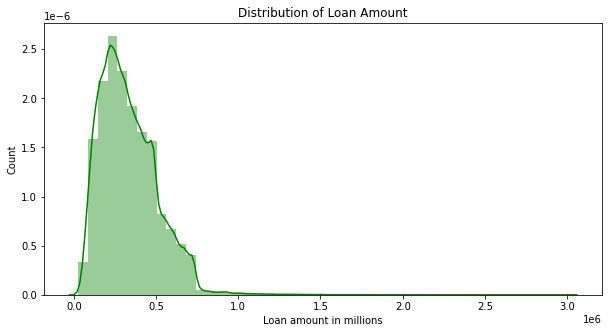

In [17]:
#Distribution of loan_amount
plt.figure(figsize=(10,5))
(sns.distplot(data1['loan_amount'],bins=50,kde=True,color = "green")).set(xlabel="Loan amount in millions", ylabel = "Count", title='Distribution of Loan Amount')
plt.show()

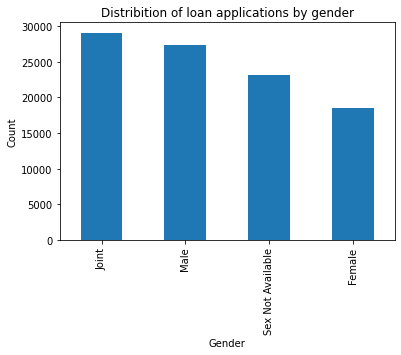

In [18]:
data1['Gender'].value_counts().plot(kind='bar',xlabel='Gender',ylabel='Count',title='Distribition of loan applications by gender')

Text(0.5, 1.0, 'Distribution of loan applicants by credit type')

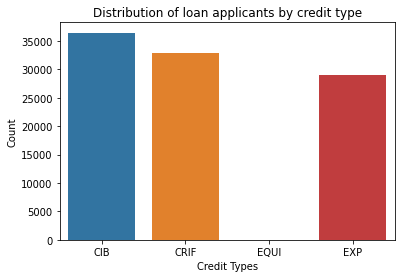

In [19]:
sns.countplot(data1['credit_type'],)
plt.xlabel('Credit Types')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by credit type')

Text(0.5, 1.0, 'Distribution of loan applicants by occupancy type')

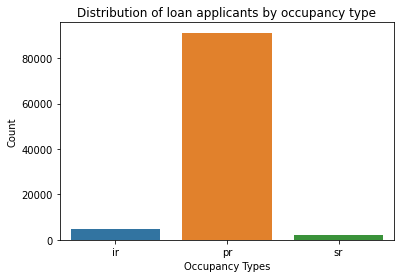

In [20]:
sns.countplot(data1['occupancy_type'])
plt.xlabel('Occupancy Types')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by occupancy type')

Text(0.5, 1.0, 'Distribution of loan applicants by purpose of the loan')

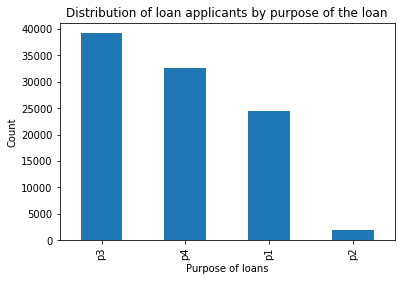

In [21]:
data1['loan_purpose'].value_counts().plot(kind='bar')
plt.xlabel('Purpose of loans')
plt.ylabel('Count')
plt.title('Distribution of loan applicants by purpose of the loan')

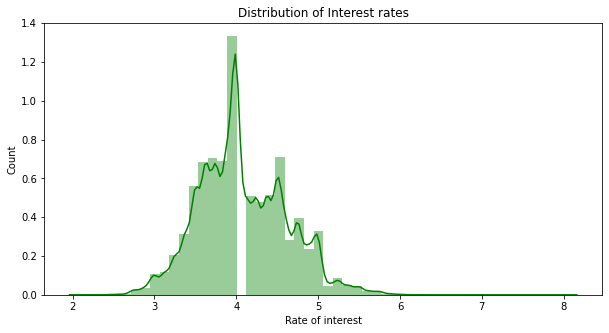

In [22]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['rate_of_interest'],bins=50,kde=True,color = "green")).set(xlabel="Rate of interest", ylabel = "Count", title='Distribution of Interest rates')
plt.show()

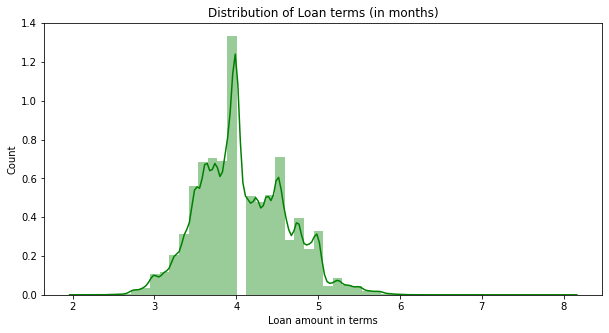

In [23]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['rate_of_interest'],bins=50,kde=True,color = "green")).set(xlabel="Loan amount in terms", ylabel = "Count", title='Distribution of Loan terms (in months)')
plt.show()

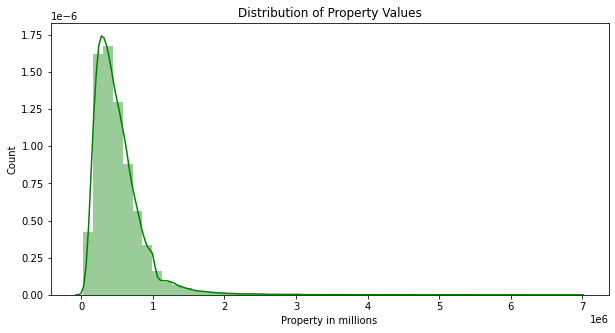

In [24]:
plt.figure(figsize=(10,5))
(sns.distplot(data1['property_value'],bins=50,kde=True,color = "green")).set(xlabel="Property in millions", ylabel = "Count", title='Distribution of Property Values')
plt.show()

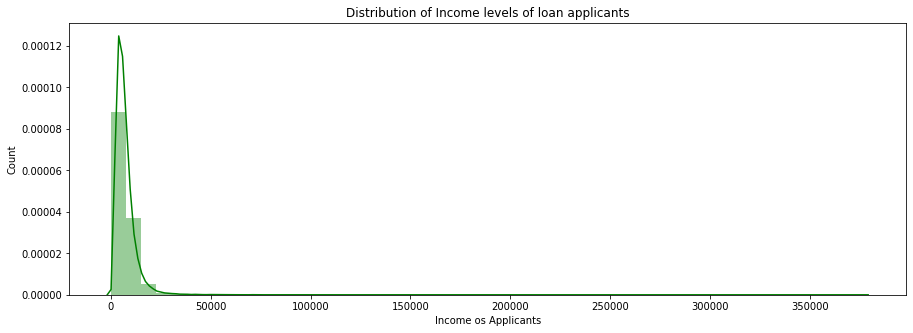

In [25]:
plt.figure(figsize=(15,5))
(sns.distplot(data1['income'],bins=50,kde=True,color = "green")).set(xlabel="Income os Applicants", ylabel = "Count", title='Distribution of Income levels of loan applicants')
plt.show()

Text(0.5, 1.0, 'Visualization of age groups of loan applicants')

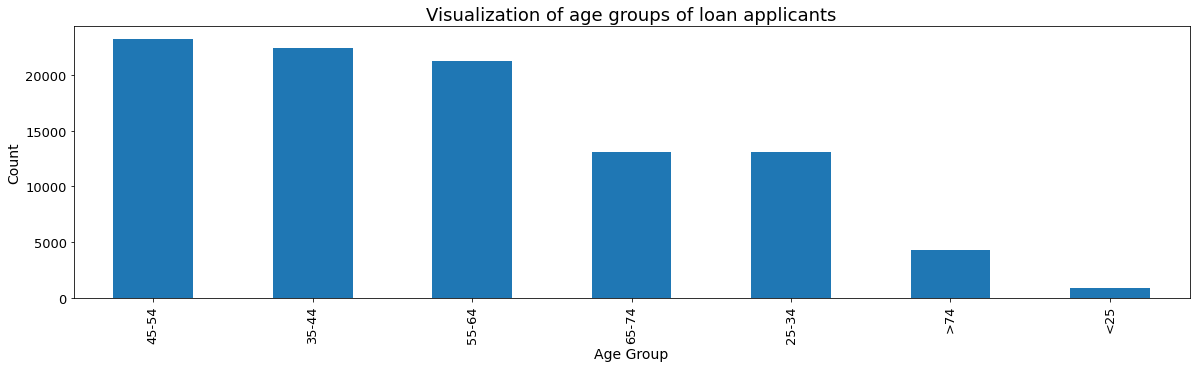

In [26]:
#displaying the distribution of age groups
data1['age'].value_counts().plot(figsize=(20, 5),kind='bar',fontsize=13)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Visualization of age groups of loan applicants',fontsize=18)

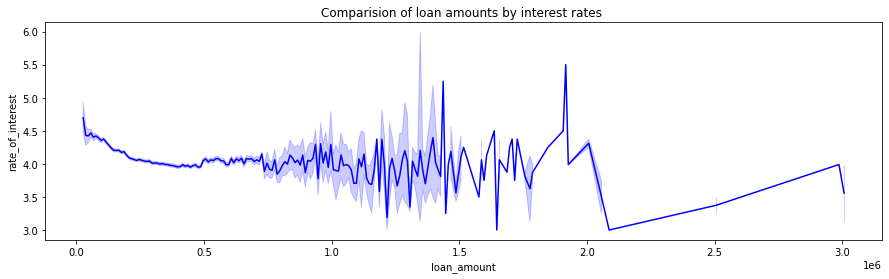

In [27]:
#displaying the comparision of loan amounts by interest rates 

plt.figure(figsize=(15,4))
sns.lineplot(x='loan_amount',y='rate_of_interest', data =data1, color = 'b')
plt.title('Comparision of loan amounts by interest rates ')
plt.show()

Text(0.5, 1.0, 'Comaprision of Interest rates by Gender')

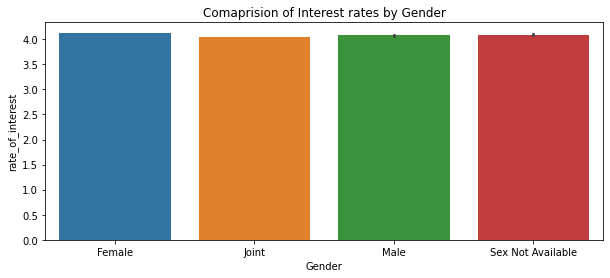

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(data1['Gender'],data1['rate_of_interest'])
plt.title('Comaprision of Interest rates by Gender')

Text(0.5, 1.0, 'Comaprision of loan amounts by Gender')

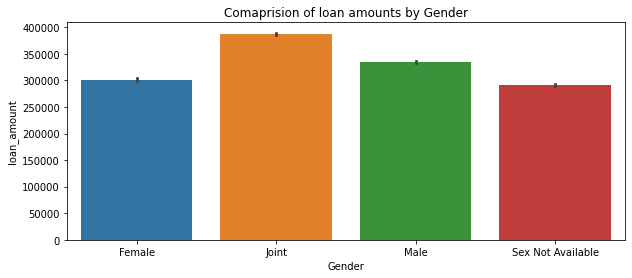

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(data1['Gender'],data1['loan_amount'])
plt.title('Comaprision of loan amounts by Gender')

Text(0.5, 1.0, 'Comparision of credit score by credit type')

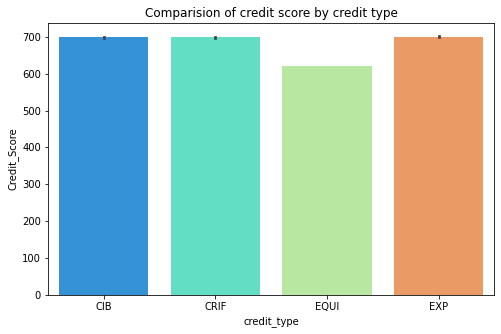

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='credit_type',y='Credit_Score',data=data1, palette='rainbow')
plt.title("Comparision of credit score by credit type")

<Figure size 432x432 with 0 Axes>

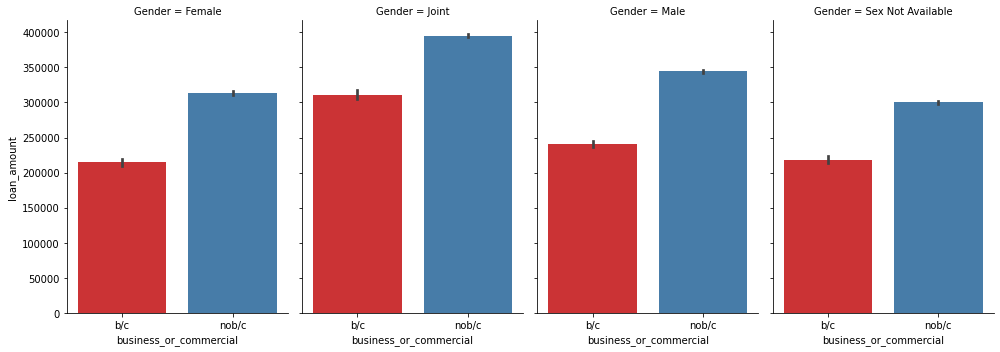

In [31]:
#Displaying the comaprision of loan amount by the gender of applicants type and nature of loan availability  
plt.figure(figsize=(6,6))
sns.catplot(x='business_or_commercial',y='loan_amount', col = 'Gender', data=data1,
                kind='bar', aspect=.7, palette='Set1')
#plt.title('comaprision of loan amount by the gender of applicants type and nature of loan availability')